In [ ]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pickle
nltk.download('stopwords')
nltk.download('wordnet')
import requests
import json
import urllib.request
import time
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
training_dataset=pd.read_csv('drive/MyDrive/Saner/Dataset (Whole-Primary)/eclipse_preproccessed_whole_dataset.csv')
training_dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,3,4,5,6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Changed,Bug Id,Description,Duplicate_Bug_Ids
0,0,518088.0,Web Tools,Web Standard Tools,RESOLVED,INVALID,search widget is not working,2017-06-10 14:42:10,518088.0,search widget is not working,NaN
1,1,546444.0,z_Archived,PDT,CLOSED,NOT_ECLIPSE,Bug,2020-05-14 11:25:40,546444.0,created attachment eclipse hello world,NaN
2,2,533893.0,Platform,Website,RESOLVED,INVALID,AntCompareCVSDebugDocIDEIncubatorPMCRelengReso...,2018-04-22 12:23:23,533893.0,created attachment error in website antcomp...,NaN
3,3,519449.0,PDE,UI,VERIFIED,FIXED,Problem with KEY_NAME,2017-08-03 03:21:28,519449.0,in product pluginsection recommendedbundles m...,NaN
4,4,519450.0,JDT,UI,RESOLVED,FIXED,Problem with KEY_NAME,2017-07-13 09:43:02,519450.0,in renametyperefactoring another type the tem...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
169783,48328,544461.0,Sirius,Server,CLOSED,WONTFIX,Add support for the update of text files,2021-01-06 05:29:02,544461.0,it should be possible to update a text file us...,NaN
169784,48331,545249.0,JDT,UI,RESOLVED,FIXED,[12] AST View should not show the implicit bre...,2019-05-24 06:06:54,545249.0,in the case of switchlabeledrule compiler a...,NaN
169785,48333,565646.0,Community,CI-Jenkins,CLOSED,DUPLICATE,help needed in ensuring that https://ci.eclips...,2020-08-14 09:01:13,565646.0,hi are there any memory cpu usage reports fo...,565863.0
169786,48334,568788.0,z_Archived,Tycho,RESOLVED,FIXED,Support new format .tgz in tycho-p2-director:a...,2021-04-28 16:52:10,568788.0,created attachment downloads for atom vscode...,NaN


In [ ]:
nan_value = float("NaN")
training_dataset.replace("", nan_value, inplace=True)
training_dataset.dropna(subset = ["Description"], inplace=True)

In [ ]:
cond = (training_dataset['Description'] == 'NaN')
cond.unique()

In [ ]:
duplicate_test = training_dataset[training_dataset['Duplicate_Bug_Ids'] > 0]
duplicate_test

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Changed,Bug Id,Description,Duplicate_Bug_Ids
25,25,542863.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[terminate] polarsys.arcon,2018-12-18 14:22:13,542863.0,i ll use this bug to track the termination rev...,528221.0
74,76,526465.0,Community,Website,CLOSED,DUPLICATE,Update the Committer Guidelines,2017-11-23 12:28:29,526465.0,there is at least one reference to eclipse fo...,526738.0
128,134,566466.0,Babel,translations,RESOLVED,DUPLICATE,Babel Language Packs R0.18.0 cannot work on 20...,2020-08-28 00:04:32,566466.0,i intalled the eclipse ide for c c developer...,565380.0
133,139,559752.0,JDT,Debug,CLOSED,DUPLICATE,breakpoints get incorrectly moved after some e...,2020-05-17 17:26:46,559752.0,i often find my breakpoint moved one or more l...,546957.0
150,156,553016.0,Dash,General,CLOSED,DUPLICATE,Create a tool that committers can use to valid...,2020-02-20 09:05:55,553016.0,we need to have a tool that committers can use...,560072.0
...,...,...,...,...,...,...,...,...,...,...,...
169747,48289,517957.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2][Ubuntu] Tiny icons in console tab views,2018-07-12 10:13:18,517957.0,created attachment screenshot with the open ...,530841.0
169749,48291,526621.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] GTK: Combobox hard to read on Ubuntu 17.10,2018-07-12 10:12:17,526621.0,when running smartgit on ubuntu t...,530841.0
169752,48294,529368.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] icons for SWT.ICON_SEARCH SWT.ICON_CAN...,2018-07-12 10:11:22,529368.0,created attachment sample screen copy with ...,530841.0
169754,48296,530693.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] Editor redrawn incorrectly on horizonta...,2018-12-07 08:22:41,530693.0,created attachment screenshot when horizo...,530841.0


In [ ]:
ted = duplicate_test['Description']

## Using TF-IDF with cosine similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re

tfidf_vectorizer = TfidfVectorizer()
stemmer = PorterStemmer()

def tokenizer(arg):
    tokens = re.split(r'(\W+)', arg.lower())
    tokens = [
        token for token in tokens
        if re.match('\\w+', token) and not re.match('\\d+', token)
    ]
    
    return list(map(stemmer.stem, tokens))
tfidf_vectorizer.tokenizer = tokenizer
tfidf_vectorizer.fit(duplicate_test.Description)
tfidf_matrix_desc = tfidf_vectorizer.transform(duplicate_test.Description)

len(tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


14522

In [ ]:
tfidf_matrix_desc.shape

(3248, 14522)

In [ ]:
ted = duplicate_test['Description']
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(3248, 17518)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(ted)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.02600384 0.06117578 ... 0.00435828 0.03350781 0.05112119]
 [0.02600384 1.         0.04307673 ... 0.0269295  0.05091219 0.07586304]
 [0.06117578 0.04307673 1.         ... 0.01425716 0.0778586  0.06389618]
 ...
 [0.00435828 0.0269295  0.01425716 ... 1.         0.03047617 0.02805041]
 [0.03350781 0.05091219 0.0778586  ... 0.03047617 1.         0.0889709 ]
 [0.05112119 0.07586304 0.06389618 ... 0.02805041 0.0889709  1.        ]]


In [ ]:
print(len(cosine_sim))
print(cosine_sim.shape)

3248
(3248, 3248)


In [ ]:
avg =np.average(cosine_sim, axis=1)
cosine_sim[1]

array([0.02600384, 1.        , 0.04307673, ..., 0.0269295 , 0.05091219,
       0.07586304])

In [ ]:
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
print(avg_df)
print(len(avg_df))

In [ ]:
avg_for_sorting = pd.DataFrame(avg_df)

In [ ]:
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
sorted

In [ ]:
import statistics
from scipy.stats import skew
#testing skewness of distribution
print(skew(avg))
print(skew(avg, bias=False))

1.0622426503594105
1.0627335077496143


In [ ]:
median = statistics.median(avg)
print(statistics.median(avg))

0.04577283682947749


In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Score',
          value=avg_df.values)

In [ ]:
score_similar_unigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= median]
score_similar_unigram

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
128,134,566466.0,Babel,translations,RESOLVED,DUPLICATE,Babel Language Packs R0.18.0 cannot work on 20...,0.061549,2020-08-28 00:04:32,566466.0,i intalled the eclipse ide for c c developer...,565380.0
133,139,559752.0,JDT,Debug,CLOSED,DUPLICATE,breakpoints get incorrectly moved after some e...,0.049821,2020-05-17 17:26:46,559752.0,i often find my breakpoint moved one or more l...,546957.0
175,183,526539.0,Platform,Ant,CLOSED,DUPLICATE,"Executing an ""ant"" build in a non java project...",0.082600,2017-10-29 11:05:12,526539.0,since having a build xml file in a pl...,522581.0
1439,1455,536600.0,Xtend,Core,CLOSED,DUPLICATE,unable to provison xtend-maven-plugin 2.14.0 d...,0.060693,2018-07-03 10:24:15,536600.0,created attachment build log from local pc ...,536445.0
1451,1468,514978.0,CDT,cdt-indexer,CLOSED,DUPLICATE,C/C++ indexer hangs on spectrum.h from PBRT v3,0.053873,2017-04-09 17:50:44,514978.0,created attachment eclipse trace log when o...,513345.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169459,47994,576309.0,CDT,terminal,CLOSED,DUPLICATE,Can't set non blocking input for the C IDEs,0.062630,2021-09-29 12:32:56,576309.0,created attachment source file to reprodu...,499881.0
169575,48115,548222.0,Equinox,Framework,RESOLVED,DUPLICATE,UnsupportedOperationException on startup of eq...,0.084089,2019-06-13 09:05:40,548222.0,this sometimes happen after a while the onl...,543844.0
169645,48186,527632.0,JDT,Core,VERIFIED,DUPLICATE,[rawtypes] Inconsistent classfile encountered:...,0.077415,2018-05-01 05:42:52,527632.0,we have a large product with many plugins wi...,518157.0
169743,48285,511734.0,ECP,EMF Forms,CLOSED,DUPLICATE,ClassCastException below ResourceSetHelpers.ad...,0.081876,2017-03-02 08:29:02,511734.0,i think we can t do much about this as the res...,511735.0


In [ ]:
score_dissimilar_unigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] < median]
score_dissimilar_unigram

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
25,25,542863.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[terminate] polarsys.arcon,0.032555,2018-12-18 14:22:13,542863.0,i ll use this bug to track the termination rev...,528221.0
74,76,526465.0,Community,Website,CLOSED,DUPLICATE,Update the Committer Guidelines,0.042897,2017-11-23 12:28:29,526465.0,there is at least one reference to eclipse fo...,526738.0
150,156,553016.0,Dash,General,CLOSED,DUPLICATE,Create a tool that committers can use to valid...,0.044686,2020-02-20 09:05:55,553016.0,we need to have a tool that committers can use...,560072.0
151,157,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,0.027462,2021-10-19 04:47:14,576714.0,affected versions of this package are vulnerab...,574220.0
607,618,565069.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] tools.gef 5.3.0,0.035827,2020-07-09 12:20:37,565069.0,we ll use this bug to track the release we re...,565088.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169636,48177,555561.0,Capella,UI,CLOSED,DUPLICATE,Double click shall not reveal/unreveal element,0.010220,2020-11-17 10:24:38,555561.0,when opening properties view double click sha...,555559.0
169747,48289,517957.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2][Ubuntu] Tiny icons in console tab views,0.044223,2018-07-12 10:13:18,517957.0,created attachment screenshot with the open ...,530841.0
169749,48291,526621.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] GTK: Combobox hard to read on Ubuntu 17.10,0.025436,2018-07-12 10:12:17,526621.0,when running smartgit on ubuntu t...,530841.0
169752,48294,529368.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] icons for SWT.ICON_SEARCH SWT.ICON_CAN...,0.028664,2018-07-12 10:11:22,529368.0,created attachment sample screen copy with ...,530841.0


In [ ]:
# import the required library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val            0.0        0.032635  0.045773        0.062293   

   upper_whisker  
0       0.106673  


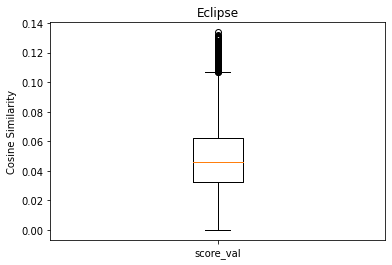

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.032635
more =  0.062293

In [ ]:
score_similar_unigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= more]
score_similar_unigram_final

In [ ]:
score_dissimilar_unigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] <= less]
score_dissimilar_unigram_final

In [ ]:
#Download to csv
score_similar_unigram_final.to_csv("eclipse_textually_similar_unigram_final.csv",index=False)
score_dissimilar_unigram_final.to_csv("eclipse_textually_dissimilar_unigram_final.csv",index=False)

In [ ]:
score_dissimilar_tfidf= score_dissimilar_unigram_final[:50]
score_dissimilar_tfidf.to_csv("eclipse_textually_dissimilar_unigram_final_top_50.csv",index=False)

In [ ]:
score_similar_tfidf= score_similar_unigram_final[:50]
score_similar_tfidf.to_csv("eclipse_textually_similar_unigram_final_top_50.csv",index=False)

## Using N gram to divide

## Unigram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(3248, 7926)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.02772912 0.06806246 ... 0.00464744 0.03647249 0.05599822]
 [0.02772912 1.         0.04494407 ... 0.0269295  0.0519688  0.07793006]
 [0.06806246 0.04494407 1.         ... 0.01487519 0.08291959 0.06848245]
 ...
 [0.00464744 0.0269295  0.01487519 ... 1.         0.03110866 0.02881469]
 [0.03647249 0.0519688  0.08291959 ... 0.03110866 1.         0.09329183]
 [0.05599822 0.07793006 0.06848245 ... 0.02881469 0.09329183 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.05015274755676305


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val            0.0        0.036113  0.050153        0.067521   

   upper_whisker  
0       0.114388  


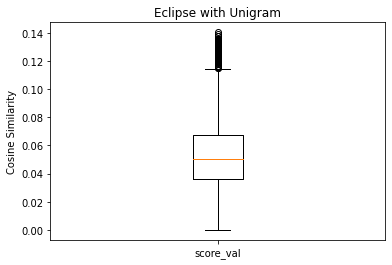

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Unigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.036113
more = 0.067521

In [ ]:
score_similar_unigram1_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= more]
score_similar_unigram1_final

In [ ]:
score_dissimilar_unigram1_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] <= less]
score_dissimilar_unigram1_final

In [ ]:
#Download to csv
score_similar_unigram1_final.to_csv("eclipse_textually_similar_unigram1_final.csv",index=False)
score_dissimilar_unigram1_final.to_csv("eclipse_textually_dissimilar_unigram1_final.csv",index=False)

In [ ]:
score_dissimilar_unigram1= score_dissimilar_unigram1_final[:50]
score_dissimilar_unigram1.to_csv("eclipse_textually_dissimilar_unigram1_final_top_50.csv",index=False)

In [ ]:
score_similar_unigram1= score_similar_unigram1_final[:50]
score_similar_unigram1.to_csv("eclipse_textually_similar_unigram1_final_top_50.csv",index=False)

## Bigram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(3248, 38501)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.02103647 0.03573216 ... 0.00205465 0.02132653 0.03291172]
 [0.02103647 1.         0.02080033 ... 0.01049538 0.03074876 0.03815296]
 [0.03573216 0.02080033 1.         ... 0.00615529 0.04493141 0.03559738]
 ...
 [0.00205465 0.01049538 0.00615529 ... 1.         0.01621948 0.01261319]
 [0.02132653 0.03074876 0.04493141 ... 0.01621948 1.         0.05724381]
 [0.03291172 0.03815296 0.03559738 ... 0.01261319 0.05724381 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.026094239003136302


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val            0.0        0.018953  0.026094        0.036831   

   upper_whisker  
0       0.063417  


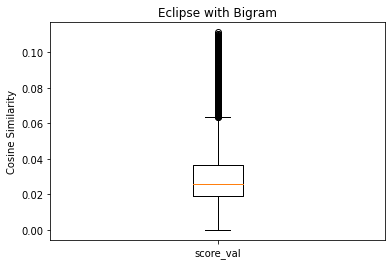

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Bigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.018953
more = 0.036831

In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Bigram',
          value=avg_df.values)
score_similar_bigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Bigram'] >= more]
score_similar_bigram

In [ ]:
score_dissimilar_bigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Bigram'] <= less]
score_dissimilar_bigram_final

In [ ]:
#Download to csv
score_similar_bigram.to_csv("eclipse_textually_similar_bigram_final.csv",index=False)
score_dissimilar_bigram_final.to_csv("eclipse_textually_dissimilar_bigram_final.csv",index=False)

In [ ]:
## Comparison with unigram and bigram for similar
score_similar_bigram['Bug ID'].equals(score_similar_unigram1_final['Bug ID'])

False

In [ ]:
bug_list_bigram = list(score_similar_bigram["Bug Id"])
bug_list_unigram = list(score_similar_unigram1_final["Bug Id"])

In [ ]:
count_id = 0
dup_id_in_bug_id = []
for i,v in enumerate(bug_list_bigram):
    if (v in bug_list_unigram):
        count_id +=1
        dup_id_in_bug_id.append(v)

In [ ]:
len(dup_id_in_bug_id)

698

In [ ]:
dup_id_in_bug_id

In [ ]:
score_similar_bigram.loc[score_similar_bigram['Bug ID'] == 517113.0]

In [ ]:
score_similar_unigram1_final.loc[score_similar_unigram1_final['Bug ID'] == 517113.0]

In [ ]:
new_sim = score_similar_bigram [score_similar_bigram['Bug ID'].isin(dup_id_in_bug_id)]

In [ ]:
new_sim

In [ ]:
## Comparison with unigram and bigram for dissimilar
score_dissimilar_bigram_final['Bug ID'].equals(score_dissimilar_unigram1_final['Bug ID'])

False

In [ ]:
bug_list_bigram_dis = list(score_dissimilar_bigram_final["Bug Id"])
bug_list_unigram_dis = list(score_dissimilar_unigram1_final["Bug Id"])

In [ ]:
count_id = 0
dup_id_in_bug_id_dis = []
for i,v in enumerate(bug_list_bigram_dis):
    if (v in bug_list_unigram_dis):
        count_id +=1
        dup_id_in_bug_id_dis.append(v)

In [ ]:
len(dup_id_in_bug_id_dis)

689

In [ ]:
new_dissim = score_dissimilar_bigram_final [score_dissimilar_bigram_final['Bug ID'].isin(dup_id_in_bug_id_dis)]

In [ ]:
new_dissim

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
151,157,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,0.016080,0.027462,2021-10-19 04:47:14,576714.0,affected versions of this package are vulnerab...,574220.0
1361,1372,517250.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] Eclipse Oxygen (4.7),0.017776,0.028924,2017-06-12 15:52:36,517250.0,we ll use this bug to track the release we re...,517249.0
1694,1721,538671.0,Community,CI-Jenkins,CLOSED,DUPLICATE,JIPP for Concurrency Utilities RI,0.016903,0.029488,2018-09-10 12:56:59,538671.0,please create a jipp for the eclipse project...,538670.0
1808,1839,527762.0,Community,Website,CLOSED,DUPLICATE,Cross site scripting,0.013729,0.015358,2017-11-27 04:46:12,527762.0,created attachment eclise screenshot vulenr...,518274.0
1812,1843,539770.0,Community,Wiki,CLOSED,DUPLICATE,"The ""allow cookies"" notice appears for every s...",0.013845,0.023366,2019-11-21 13:52:27,539770.0,i am prompted to accept cookies with every pag...,552928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169390,47922,575059.0,JDT,Core,RESOLVED,DUPLICATE,[17] flag error for non-exhaustive switch expr...,0.015300,0.028894,2021-08-12 21:30:28,575059.0,from a switch expression must be exhaus...,575050.0
169507,48043,576786.0,JDT,Core,RESOLVED,DUPLICATE,[18][switch pattern] - Conditions for Exhausti...,0.016472,0.029899,2022-01-07 04:45:25,576786.0,section jep says t supports a sealed...,576785.0
169636,48177,555561.0,Capella,UI,CLOSED,DUPLICATE,Double click shall not reveal/unreveal element,0.006821,0.010220,2020-11-17 10:24:38,555561.0,when opening properties view double click sha...,555559.0
169749,48291,526621.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] GTK: Combobox hard to read on Ubuntu 17.10,0.013951,0.025436,2018-07-12 10:12:17,526621.0,when running smartgit on ubuntu t...,530841.0


## Trigram 

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(3248, 65567)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.01685784 0.03058306 ... 0.00167927 0.01846553 0.02925131]
 [0.01685784 1.         0.01579054 ... 0.00760826 0.02361426 0.03007657]
 [0.03058306 0.01579054 1.         ... 0.00476572 0.03685441 0.02997166]
 ...
 [0.00167927 0.00760826 0.00476572 ... 1.         0.01270389 0.01014094]
 [0.01846553 0.02361426 0.03685441 ... 0.01270389 1.         0.04875747]
 [0.02925131 0.03007657 0.02997166 ... 0.01014094 0.04875747 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.021174778349494626


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val            0.0        0.015591  0.021175        0.029714   

   upper_whisker  
0       0.050722  


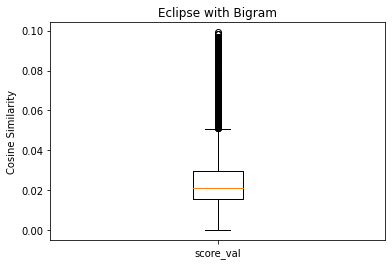

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Bigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.015591
more = 0.029714

In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Trigram',
          value=avg_df.values)
score_similar_trigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Trigram'] >= more]
score_similar_trigram

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
133,139,559752.0,JDT,Debug,CLOSED,DUPLICATE,breakpoints get incorrectly moved after some e...,0.031227,0.035445,0.049821,2020-05-17 17:26:46,559752.0,i often find my breakpoint moved one or more l...,546957.0
175,183,526539.0,Platform,Ant,CLOSED,DUPLICATE,"Executing an ""ant"" build in a non java project...",0.035231,0.043071,0.082600,2017-10-29 11:05:12,526539.0,since having a build xml file in a pl...,522581.0
1439,1455,536600.0,Xtend,Core,CLOSED,DUPLICATE,unable to provison xtend-maven-plugin 2.14.0 d...,0.033893,0.042663,0.060693,2018-07-03 10:24:15,536600.0,created attachment build log from local pc ...,536445.0
1724,1752,521057.0,JDT,Core,VERIFIED,DUPLICATE,Internal compiler error: java.lang.NullPointer...,0.065150,0.078524,0.102634,2018-01-02 07:11:59,521057.0,created attachment source code that causes t...,517951.0
1881,1914,515976.0,z_Archived,Tycho,CLOSED,DUPLICATE,NPE during execution of org.eclipse.tycho:tych...,0.030835,0.042163,0.062864,2021-04-28 16:51:19,515976.0,we are encountering npe during this execution ...,512326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169026,47553,569402.0,Platform,Text,CLOSED,DUPLICATE,Support resolving hyperlinks without freezing ...,0.036707,0.044757,0.068871,2020-12-03 08:05:56,569402.0,see also the discussion here bug cgi id ...,506467.0
169074,47603,570387.0,Platform,CVS,CLOSED,DUPLICATE,Date format not applied (SVN),0.030318,0.035932,0.059014,2021-01-15 07:43:53,570387.0,in settings team svn label decorations y...,570135.0
169575,48115,548222.0,Equinox,Framework,RESOLVED,DUPLICATE,UnsupportedOperationException on startup of eq...,0.064757,0.074790,0.084089,2019-06-13 09:05:40,548222.0,this sometimes happen after a while the onl...,543844.0
169645,48186,527632.0,JDT,Core,VERIFIED,DUPLICATE,[rawtypes] Inconsistent classfile encountered:...,0.035196,0.042290,0.077415,2018-05-01 05:42:52,527632.0,we have a large product with many plugins wi...,518157.0


In [ ]:
score_dissimilar_trigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Trigram'] <= less]
score_dissimilar_trigram_final

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
151,157,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,0.014263,0.016080,0.027462,2021-10-19 04:47:14,576714.0,affected versions of this package are vulnerab...,574220.0
879,890,513150.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] technology.collections 8.1.0,0.013696,0.017821,0.032804,2017-03-15 16:41:54,513150.0,we ll use this bug to track the release we re...,513149.0
891,902,540216.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] technology.app4mc 0.9.2,0.013696,0.017821,0.032804,2018-10-18 11:04:44,540216.0,we ll use this bug to track the release we re...,539997.0
1005,1016,542667.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] modeling.mmt.qvtd 2018.0.0,0.013696,0.017821,0.032804,2019-02-07 12:07:52,542667.0,we ll use this bug to track the release we re...,542532.0
1158,1169,542639.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] iot.wakaama 1.0.0,0.013696,0.017821,0.032804,2019-01-08 12:34:10,542639.0,we ll use this bug to track the release we re...,542638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169390,47922,575059.0,JDT,Core,RESOLVED,DUPLICATE,[17] flag error for non-exhaustive switch expr...,0.012449,0.015300,0.028894,2021-08-12 21:30:28,575059.0,from a switch expression must be exhaus...,575050.0
169507,48043,576786.0,JDT,Core,RESOLVED,DUPLICATE,[18][switch pattern] - Conditions for Exhausti...,0.013389,0.016472,0.029899,2022-01-07 04:45:25,576786.0,section jep says t supports a sealed...,576785.0
169636,48177,555561.0,Capella,UI,CLOSED,DUPLICATE,Double click shall not reveal/unreveal element,0.005806,0.006821,0.010220,2020-11-17 10:24:38,555561.0,when opening properties view double click sha...,555559.0
169749,48291,526621.0,Platform,SWT,CLOSED,DUPLICATE,[GTK2] GTK: Combobox hard to read on Ubuntu 17.10,0.010740,0.013951,0.025436,2018-07-12 10:12:17,526621.0,when running smartgit on ubuntu t...,530841.0


In [ ]:
#Download to csv
score_similar_trigram.to_csv("eclipse_textually_similar_trigram_final.csv",index=False)
score_dissimilar_trigram_final.to_csv("eclipse_textually_dissimilar_trigram_final.csv",index=False)

In [ ]:
## Comparison with unigram and bigram for similar
score_similar_trigram['Bug ID'].equals(new_sim['Bug ID'])

False

In [ ]:
bug_list_trigram = list(score_similar_bigram["Bug Id"])
bug_list_bi_uni = list(new_sim["Bug Id"])

In [ ]:
len(bug_list_bi_uni)


698

In [ ]:
count_id = 0
dup_id_in_bug_id_tri = []
for i,v in enumerate(bug_list_trigram):
    if (v in bug_list_bi_uni):
        count_id +=1
        dup_id_in_bug_id_tri.append(v)

In [ ]:
len(dup_id_in_bug_id_tri)

698

In [ ]:
dup_id_in_bug_id_tri

In [ ]:
new_sim_final = score_similar_trigram[score_similar_trigram['Bug ID'].isin(dup_id_in_bug_id_tri)]

In [ ]:
new_sim_final

In [ ]:
## Comparison with unigram and bigram for dissimilar
score_dissimilar_trigram_final['Bug ID'].equals(new_dissim['Bug ID'])

False

In [ ]:
bug_list_trigram_dis = list(score_dissimilar_trigram_final["Bug Id"])
bug_list_uni_bi_dis = list(new_dissim["Bug Id"])

In [ ]:
count_id = 0
dup_id_in_bug_id_dis_tri = []
for i,v in enumerate(bug_list_trigram_dis):
    if (v in bug_list_uni_bi_dis):
        count_id +=1
        dup_id_in_bug_id_dis_tri.append(v)

In [ ]:
len(dup_id_in_bug_id_dis_tri)

662

In [ ]:
new_dissim_final = score_dissimilar_trigram_final [score_dissimilar_trigram_final['Bug ID'].isin(dup_id_in_bug_id_dis_tri)]

In [ ]:
new_dissim_final

In [ ]:
#Download to csv
new_sim_final.to_csv("eclipse_final_sim.csv",index=False)
new_dissim_final.to_csv("eclipse_final_dis.csv",index=False)

In [ ]:
new_sim_final.info()

## Textually similar pair

In [ ]:
#dropping duplicates from Tex sim
df_sim = new_sim_final.drop_duplicates(subset=['Bug ID', 'Summary','Description','Average_Cos_Similarity_Score', 'Average_Cos_Similarity_Bigram', 'Average_Cos_Similarity_Trigram','Duplicate_Bug_Ids' ], keep='first')
df_sim.shape

(679, 14)

In [ ]:
df_sim.info()

In [ ]:
# Duplicate pair ( b- & b+)
a = df_sim[['Bug ID', 'Duplicate_Bug_Ids', 'Average_Cos_Similarity_Trigram']]
a.reset_index(drop=True, inplace=True)
na = a.to_numpy()



s=[]
for i in range(0, 679):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['Summary1'] = se.values 

s=[]
for i in range(0, 679):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description1'] = se.values

s=[]
for i in range(0, 679):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['summary2'] = se.values 

s=[]
for i in range(0, 679):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description2'] = se.values

a["is_similar"] = 1


a.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,526539.0,522581.0,0.035231,"['Executing an ""ant"" build in a non java proje...",['since having a build xml file in a ...,['Cannot run ant build file from generic proje...,['created attachment screen grab showing err...,1
1,521057.0,517951.0,0.065150,['Internal compiler error: java.lang.NullPoint...,['created attachment source code that causes...,['Internal compiler error: null pointer except...,['it looks like eclipse has trouble with...,1
2,515976.0,512326.0,0.030835,['NPE during execution of org.eclipse.tycho:ty...,['we are encountering npe during this executio...,['NPE with tycho-versions-plugin:update-pom'],['getting npe when i tried to use tycho ...,1
3,516277.0,517672.0,0.030041,['Exception when launching server'],['created attachment osgi capture since ...,"['Meta File Error, file IO error']",['created attachment orion log this error...,1
4,515243.0,515213.0,0.031605,['Oxygen installation via Eclipse Installer cu...,['created attachment log of eclipse installe...,"['Many mirrors are broken, probably because an...",['created attachment installer log what i d...,1


In [ ]:
a['summary2'][1]

"['Internal compiler error: null pointer exception on method reference to varargs method in a finally block']"

In [ ]:
df_sim_fin= a.copy()
df_sim_fin

In [ ]:
df_sim_fin['summary2'] = df_sim_fin['summary2'].replace(['[]'],'0')
df_sim_fin['description2'] = df_sim_fin['description2'].replace(['[]'],'0')

In [ ]:
df_sim_fin.drop(df_sim_fin.loc[df_sim_fin['summary2']=='0'].index, inplace=True)
df_sim_fin

In [ ]:
df_sim_fin.drop(df_sim_fin.loc[df_sim_fin['description2']=='0'].index, inplace=True)
df_sim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,526539.0,522581.0,0.035231,"['Executing an ""ant"" build in a non java proje...",['since having a build xml file in a ...,['Cannot run ant build file from generic proje...,['created attachment screen grab showing err...,1
1,521057.0,517951.0,0.065150,['Internal compiler error: java.lang.NullPoint...,['created attachment source code that causes...,['Internal compiler error: null pointer except...,['it looks like eclipse has trouble with...,1
2,515976.0,512326.0,0.030835,['NPE during execution of org.eclipse.tycho:ty...,['we are encountering npe during this executio...,['NPE with tycho-versions-plugin:update-pom'],['getting npe when i tried to use tycho ...,1
3,516277.0,517672.0,0.030041,['Exception when launching server'],['created attachment osgi capture since ...,"['Meta File Error, file IO error']",['created attachment orion log this error...,1
4,515243.0,515213.0,0.031605,['Oxygen installation via Eclipse Installer cu...,['created attachment log of eclipse installe...,"['Many mirrors are broken, probably because an...",['created attachment installer log what i d...,1
...,...,...,...,...,...,...,...,...
668,538019.0,537836.0,0.046354,['Cannot install remote marketplace locations:...,['eclipse buildid java version ...,['Error at to run marketplace'],['what steps will reproduce the problem ...,1
670,543233.0,509820.0,0.087349,['Error on clickking a js file with conflict'],['when i try to use the merge tool on a js fil...,['Compare With ... not working for Javascript ...,['created attachment export of eclipse error...,1
676,548222.0,543844.0,0.064757,['UnsupportedOperationException on startup of ...,['this sometimes happen after a while the o...,['FrameworkExtensionInstaller in dev mode is u...,['if string devpaths configuration g...,1
677,527632.0,518157.0,0.035196,['[rawtypes] Inconsistent classfile encountere...,['we have a large product with many plugins ...,['A Class<? extends RawType> = Impl.class wher...,[' overview this is a new bug in oxygen n...,1


In [ ]:
df_sim_fin.to_csv("Eclipse_textually_similar_pair.csv")
from google.colab import files
files.download("Eclipse_textually_similar_pair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Textually dissimilar pair

In [ ]:
#dropping duplicates from Tex sim
df_dissim = new_dissim_final.drop_duplicates(subset=['Bug ID', 'Summary','Description','Average_Cos_Similarity_Score', 'Average_Cos_Similarity_Bigram', 'Average_Cos_Similarity_Trigram','Duplicate_Bug_Ids' ], keep='first')
df_dissim.shape

(662, 14)

In [ ]:
df_dissim.info()

In [ ]:
# Duplicate pair ( b- & b+)
a = df_dissim[['Bug ID', 'Duplicate_Bug_Ids', 'Average_Cos_Similarity_Trigram']]
a.reset_index(drop=True, inplace=True)
na = a.to_numpy()


s=[]
for i in range(0, 662):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['Summary1'] = se.values 

s=[]
for i in range(0, 662):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description1'] = se.values

s=[]
for i in range(0, 662):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['summary2'] = se.values 

s=[]
for i in range(0, 662):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description2'] = se.values
a["is_similar"] = 1

a.head()

In [ ]:
a['summary2'][1]

"['[release] eclipse 4.7.0']"

In [ ]:
df_dissim_fin= a.copy()
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,576714.0,574220.0,0.014263,['Upgrade org.apache.sshd:sshd-core to version...,['affected versions of this package are vulner...,['Apache MINA sshd: update to 2.7.0'],['update the dependency and remove work around...,1
1,517250.0,517249.0,0.014451,['[release] Eclipse Oxygen (4.7)'],['we ll use this bug to track the release we ...,['[release] eclipse 4.7.0'],['we ll use this bug to track the release we ...,1
2,538671.0,538670.0,0.013392,['JIPP for Concurrency Utilities RI'],['please create a jipp for the eclipse proje...,['JIPP for Concurrency Utilities API'],['please create a jipp for the eclipse proje...,1
3,527762.0,518274.0,0.012121,['Cross site scripting'],['created attachment eclise screenshot vule...,[],[],1
4,539770.0,552928.0,0.011421,"['The ""allow cookies"" notice appears for every...",['i am prompted to accept cookies with every p...,"[""'allow cookies' banner re-appears after ever...",['using firefox the allow cookies ba...,1
...,...,...,...,...,...,...,...,...
657,575059.0,575050.0,0.012449,['[17] flag error for non-exhaustive switch ex...,['from a switch expression must be exha...,['[17] check whether switch is exhaustive'],['sec starting from a switch block co...,1
658,576786.0,576785.0,0.013389,['[18][switch pattern] - Conditions for Exhaus...,['section jep says t supports a seal...,['[18][switch pattern] Applicability of T'],['addition in section jep a class ...,1
659,555561.0,555559.0,0.005806,['Double click shall not reveal/unreveal eleme...,['when opening properties view double click s...,"[""Double-clicking on an Element should not fol...",['double clicking on an element should not fol...,1
660,526621.0,530841.0,0.010740,['[GTK2] GTK: Combobox hard to read on Ubuntu ...,['when running smartgit on ubuntu ...,['[GTK2] Remove GTK 2.x support'],['tl dr gtk x bugs are not investigated any...,1


In [ ]:
df_dissim_fin['summary2'] = df_dissim_fin['summary2'].replace(['[]'],'0')
df_dissim_fin['description2'] = df_dissim_fin['description2'].replace(['[]'],'0')

In [ ]:
df_dissim_fin.drop(df_dissim_fin.loc[df_dissim_fin['summary2']=='0'].index, inplace=True)
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,576714.0,574220.0,0.014263,['Upgrade org.apache.sshd:sshd-core to version...,['affected versions of this package are vulner...,['Apache MINA sshd: update to 2.7.0'],['update the dependency and remove work around...,1
1,517250.0,517249.0,0.014451,['[release] Eclipse Oxygen (4.7)'],['we ll use this bug to track the release we ...,['[release] eclipse 4.7.0'],['we ll use this bug to track the release we ...,1
2,538671.0,538670.0,0.013392,['JIPP for Concurrency Utilities RI'],['please create a jipp for the eclipse proje...,['JIPP for Concurrency Utilities API'],['please create a jipp for the eclipse proje...,1
4,539770.0,552928.0,0.011421,"['The ""allow cookies"" notice appears for every...",['i am prompted to accept cookies with every p...,"[""'allow cookies' banner re-appears after ever...",['using firefox the allow cookies ba...,1
5,543311.0,543300.0,0.009620,['login page is not working'],['login page is not openinng'],['ide page is not open'],['enter url click on ide blog page not open r...,1
...,...,...,...,...,...,...,...,...
657,575059.0,575050.0,0.012449,['[17] flag error for non-exhaustive switch ex...,['from a switch expression must be exha...,['[17] check whether switch is exhaustive'],['sec starting from a switch block co...,1
658,576786.0,576785.0,0.013389,['[18][switch pattern] - Conditions for Exhaus...,['section jep says t supports a seal...,['[18][switch pattern] Applicability of T'],['addition in section jep a class ...,1
659,555561.0,555559.0,0.005806,['Double click shall not reveal/unreveal eleme...,['when opening properties view double click s...,"[""Double-clicking on an Element should not fol...",['double clicking on an element should not fol...,1
660,526621.0,530841.0,0.010740,['[GTK2] GTK: Combobox hard to read on Ubuntu ...,['when running smartgit on ubuntu ...,['[GTK2] Remove GTK 2.x support'],['tl dr gtk x bugs are not investigated any...,1


In [ ]:
df_dissim_fin.drop(df_dissim_fin.loc[df_dissim_fin['description2']=='0'].index, inplace=True)
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,576714.0,574220.0,0.014263,['Upgrade org.apache.sshd:sshd-core to version...,['affected versions of this package are vulner...,['Apache MINA sshd: update to 2.7.0'],['update the dependency and remove work around...,1
1,517250.0,517249.0,0.014451,['[release] Eclipse Oxygen (4.7)'],['we ll use this bug to track the release we ...,['[release] eclipse 4.7.0'],['we ll use this bug to track the release we ...,1
2,538671.0,538670.0,0.013392,['JIPP for Concurrency Utilities RI'],['please create a jipp for the eclipse proje...,['JIPP for Concurrency Utilities API'],['please create a jipp for the eclipse proje...,1
4,539770.0,552928.0,0.011421,"['The ""allow cookies"" notice appears for every...",['i am prompted to accept cookies with every p...,"[""'allow cookies' banner re-appears after ever...",['using firefox the allow cookies ba...,1
5,543311.0,543300.0,0.009620,['login page is not working'],['login page is not openinng'],['ide page is not open'],['enter url click on ide blog page not open r...,1
...,...,...,...,...,...,...,...,...
657,575059.0,575050.0,0.012449,['[17] flag error for non-exhaustive switch ex...,['from a switch expression must be exha...,['[17] check whether switch is exhaustive'],['sec starting from a switch block co...,1
658,576786.0,576785.0,0.013389,['[18][switch pattern] - Conditions for Exhaus...,['section jep says t supports a seal...,['[18][switch pattern] Applicability of T'],['addition in section jep a class ...,1
659,555561.0,555559.0,0.005806,['Double click shall not reveal/unreveal eleme...,['when opening properties view double click s...,"[""Double-clicking on an Element should not fol...",['double clicking on an element should not fol...,1
660,526621.0,530841.0,0.010740,['[GTK2] GTK: Combobox hard to read on Ubuntu ...,['when running smartgit on ubuntu ...,['[GTK2] Remove GTK 2.x support'],['tl dr gtk x bugs are not investigated any...,1


In [ ]:
df_dissim_fin.to_csv("Eclipse_textually_dissimilar_pair.csv")
from google.colab import files
files.download("Eclipse_textually_dissimilar_pair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>